In [1]:
import numpy as np
import matplotlib.pylab as plt

### Define the constants

In [2]:
## define alpha
alpha=1.11*(10**(-4))#*100

### Define the variables

In [3]:
## define x
nx=200
x=np.linspace(0,1,nx)
dx=x[1]-x[0]

## define t
nt=10000
t=np.linspace(0,10,nt)
dt=t[1]-t[0]

## define T with zeros
T=np.zeros((nx,nt),dtype=np.float64)

### Set the Initial and Boundary Conditions

In [4]:
## Initial condition
T[:,0]=300.

## boundary conditions
T[0,:]=400.
T[nx-1,:]=300.

### Calculate the Temperature

No need to optimize the code. Use for-loops

In [5]:
%%time
for k in range(0,nt-1):
	for i in range(1,nx-1): #from 1 to nx-2
		C=alpha*dt/(dx**2)
		T[i,k+1]=C*T[i+1,k] + (-2.*C+1.)*T[i,k] + C*T[i-1,k]

CPU times: user 2.04 s, sys: 7.11 ms, total: 2.05 s
Wall time: 2.05 s


### Plot the Temperature change at 10 different timestamps

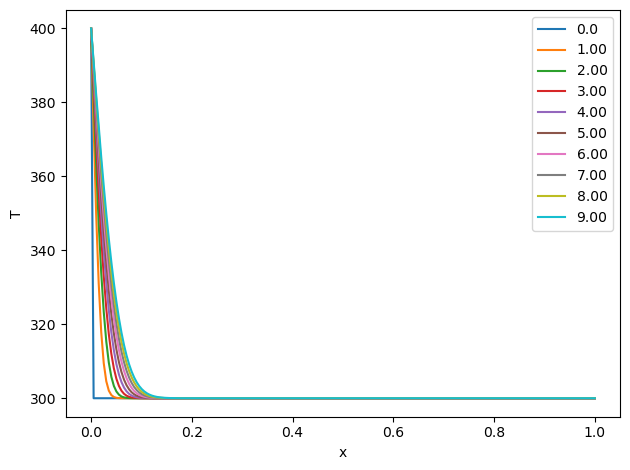

In [6]:
fig, ax=plt.subplots(1,1)
for k in range(0,nt,int(nt/10)):
	ax.plot(x,T[:,k], label=str(k*dt)[:4]);
ax.set_xlabel('x');
ax.set_ylabel('T')
fig.tight_layout()
plt.legend()
plt.show()

### Let's vectorize the calculation

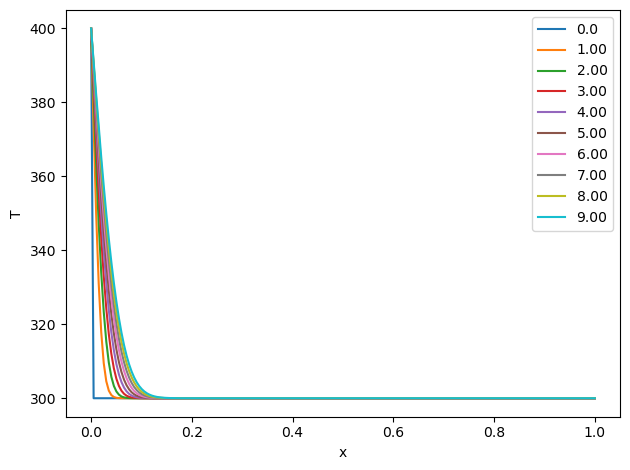

CPU times: user 146 ms, sys: 3.94 ms, total: 150 ms
Wall time: 150 ms


In [7]:
%%time

"""
# Original implementation
for k in range(0,nt-1):
	for i in range(1,nx-1): #from 1 to nx-2
		C=alpha*dt/(dx**2)
		T[i,k+1]=C*T[i+1,k] + (-2.*C+1.)*T[i,k] + C*T[i-1,k]
"""
## define T with zeros
T=np.zeros((nx,nt),dtype=np.float64)

## Initial condition
T[:,0]=300.

## boundary conditions
T[0,:]=400.
T[nx-1,:]=300.
#--------------------------------------------#
C=alpha*dt/(dx**2)
for k in range(0,nt-1):
	T[1:nx-1,k+1]=C*T[2:nx,k] + (-2.*C+1.)*T[1:nx-1,k] + C*T[0:nx-2,k]

#--------------------------------------------#
fig, ax=plt.subplots(1,1)
for k in range(0,nt,int(nt/10)):
	ax.plot(x,T[:,k], label=str(k*dt)[:4]);
ax.set_xlabel('x');
ax.set_ylabel('T')
fig.tight_layout()
plt.legend()
plt.show()

### Not all vectorizations are good! Always check the results!

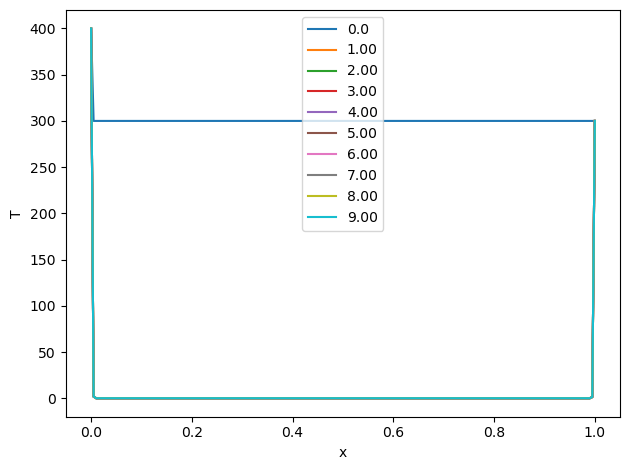

CPU times: user 124 ms, sys: 6.93 ms, total: 131 ms
Wall time: 130 ms


In [18]:
%%time

"""
# Original implementation
for k in range(0,nt-1):
	for i in range(1,nx-1): #from 1 to nx-2
		C=alpha*dt/(dx**2)
		T[i,k+1]=C*T[i+1,k] + (-2.*C+1.)*T[i,k] + C*T[i-1,k]
"""
## define T with zeros
T=np.zeros((nx,nt),dtype=np.float64)

## Initial condition
T[:,0]=300.

## boundary conditions
T[0,:]=400.
T[nx-1,:]=300.
#--------------------------------------------#
C=alpha*dt/(dx**2)
klist=np.arange(0,nt-1)
T[1:nx-1,klist+1]=C*T[2:nx,klist] + (-2.*C+1.)*T[1:nx-1,klist] + C*T[0:nx-2,klist]

#--------------------------------------------#
fig, ax=plt.subplots(1,1)
for k in range(0,nt,int(nt/10)):
	ax.plot(x,T[:,k], label=str(k*dt)[:4]);

ax.set_xlabel('x');
ax.set_ylabel('T')
fig.tight_layout()
plt.legend()
plt.show()